# NBA-Data-2010-2024 🏀

## Schema for Box_scores

### Dimensions
- **season_year**: The year of the basketball season.
- **game_date**: The date of the game.
- **gameId**: Unique identifier for the game.
- **teamId**: Unique identifier for the team.
- **teamCity**: The city where the team is based.
- **teamName**: The name of the team.
- **teamTricode**: A three-letter code representing the team.
- **teamSlug**: A unique identifier for the team.
- **personId**: Unique identifier for the person (player).
- **personName**: The name of the person (player).
- **position**: The position of the player.
- **comment**: Any additional comments or notes.
- **jerseyNum**: The jersey number of the player.

### Metrics
- **minutes**: The number of minutes played by the player.
- **fieldGoalsMade**: The number of field goals made by the player.
- **fieldGoalsAttempted**: The number of field goals attempted by the player.
- **fieldGoalsPercentage**: The shooting percentage for field goals.
- **threePointersMade**: The number of three-pointers made by the player.
- **threePointersAttempted**: The number of three-pointers attempted by the player.
- **threePointersPercentage**: The shooting percentage for three-pointers.
- **freeThrowsMade**: The number of free throws made by the player.
- **freeThrowsAttempted**: The number of free throws attempted by the player.
- **freeThrowsPercentage**: The shooting percentage for free throws.
- **reboundsOffensive**: The number of offensive rebounds by the player.
- **reboundsDefensive**: The number of defensive rebounds by the player.
- **reboundsTotal**: The total number of rebounds by the player.
- **assists**: The number of assists by the player.
- **steals**: The number of steals by the player.
- **blocks**: The number of blocks by the player.
- **turnovers**: The number of turnovers by the player.
- **foulsPersonal**: The number of personal fouls committed by the player.
- **points**: The total number of points scored by the player.
- **plusMinusPoints**: The plus-minus statistic for the player, indicating the team's score differential when the player is on the court.

## Schema of game totals 

### Dimensions
- **SEASON_YEAR**: The year of the NBA season.
- **TEAM_ID**: Unique identifier for the team.
- **TEAM_ABBREVIATION**: Abbreviated name of the team.
- **TEAM_NAME**: Full name of the team.
- **GAME_ID**: Unique identifier for the game.
- **GAME_DATE**: Date of the game.
- **MATCHUP**: Matchup details indicating the teams involved.
- **WL**: Outcome of the game (Win or Loss).

### Metrics
- **MIN**: Total minutes played in the game.
- **FGM**: Field goals made.
- **FGA**: Field goals attempted.
- **FG_PCT**: Field goal percentage.
- **FG3M**: Three-point field goals made.
- **FG3A**: Three-point field goals attempted.
- **FG3_PCT**: Three-point field goal percentage.
- **FTM**: Free throws made.
- **FTA**: Free throws attempted.
- **FT_PCT**: Free throw percentage.
- **OREB**: Offensive rebounds.
- **DREB**: Defensive rebounds.
- **REB**: Total rebounds.
- **AST**: Assists.
- **TOV**: Turnovers.
- **STL**: Steals.
- **BLK**: Blocks.
- **BLKA**: Opponent's blocks.
- **PF**: Personal fouls.
- **PFD**: Personal fouls drawn.
- **PTS**: Total points scored.
- **PLUS_MINUS**: Plus-minus statistic.
- **GP_RANK**: Rank based on games played.
- **W_RANK**: Rank based on wins.
- **L_RANK**: Rank based on losses.
- **W_PCT_RANK**: Rank based on win percentage.
- **MIN_RANK**: Rank based on minutes played.
- **Ranks for various statistical categories like field goals made, rebounds, assists, etc., indicated by suffix _RANK.**
- **AVAILABLE_FLAG**: Indicates if the data for this row is available.

## Authors

- [@NocturneBear](https://github.com/NocturneBear)

## License

[MIT](https://github.com/NocturneBear/NBA-Data-2010-2024/blob/main/LICENSE)

# NBA facts
Regular season each team makes 82 games.
The Best 8 teams of each conference (WEST & EAST), makes to the playoffs.
The goal with this model is to predict the probability of the winning a game between a specific matchup.
## Important Game Features 
- Home/ Away Game 
- Players List 
## Important Player Features
- season (season_year)
- position (position)
- team (teamId)
- time played (MIN)
- Field Goal Made (fieldGoalsMade)
- Field Goal Percentage (fieldGoalsPercentage)
- Field Goal Made 3PT (treePointersMade)
- Field Goal Percentage 3PT (threePointersPercentage)
- Free throw made (freeThrowsMade)
- Free Throw (percentagefreeThrowsPercentage)
- assists
- rebounds 
- steals 
- turnovers
- foulsPersonal
- blocks 
- points 
- plusMinusPoints

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [ ]:
NUM_GAMES=82
playoff_games_total=pd.read_csv("./datasets/NBA_DATA_2010_2024/play_off_totals_2010_2024.csv",delimiter=',',header=0)
regular_games_total=pd.read_csv("./datasets/NBA_DATA_2010_2024/regular_season_totals_2010_2024.csv",delimiter=',',header=0)
regular_season_all_parts=pd.concat([
        pd.read_csv("./datasets/NBA_DATA_2010_2024/regular_season_box_scores_2010_2024_part_1.csv",delimiter=',',header=0),
        pd.read_csv("./datasets/NBA_DATA_2010_2024/regular_season_box_scores_2010_2024_part_2.csv",delimiter=',',header=0),
        pd.read_csv("./datasets/NBA_DATA_2010_2024/regular_season_box_scores_2010_2024_part_3.csv",delimiter=',',header=0)])

In [251]:
def convert_min_to_float(min_str):
    if isinstance(min_str, str) and ':' in min_str:
        mins, secs = map(int, min_str.split(':'))
        return mins + secs / 60
    return 0.0  # handle empty or malformed entries

In [252]:
def convert_int_season_to_str(season):
    if isinstance(season, int):
        return f"{season}-{season%2000 +1 :02d}" 
    return season

## Line of thinking
Since taking into account the players and match stats is difficult for an ML to process without giving to much disparced and unrelated data, we want to focus on what would be the main input parameters when we're using the model to make predictions. 
Such parameters would be: 
- binary value of home or away game,
- the visitor team,
- the home team,
- the list of visitor players,
- the list of home players 
Thereby it would be first a good approach to make a simple logistics regression model based on a teams overall player's score just for simplicity and data exploration purposes.
For that we want to aggregate the data based on the players and season, on the regular season.


In [253]:
def getPlayerStatsBySeason(scores,season,playername=None):
    """
    Function to get the stats of a player in a season
    :param player_name: player name
    :param season: season
    :return: stats of the player in the season
    """
    season=convert_int_season_to_str(season)
    scores = scores[scores['minutes'].notna()].copy()
    scores['minutesParsed'] = scores['minutes'].apply(convert_min_to_float)
    playersGrouped=scores.groupby(['personName','season_year'])
    playersAggregated=playersGrouped.agg(
        {
            ''
            'points':'mean',
            'assists':'mean',
            'reboundsTotal':'mean',
            'steals':'mean',
            'blocks':'mean',
            'turnovers':'mean',
            'minutesParsed':'mean',
            'fieldGoalsMade':'mean',
            'fieldGoalsPercentage':'mean',
            'threePointersMade':'mean',
            'threePointersPercentage':'mean'
        }).reset_index()
    games_of_player_on_season=playersAggregated[playersAggregated['season_year']==season]
    if playername is not None:
        games_of_player_on_season=games_of_player_on_season[games_of_player_on_season['personName'].str.contains(playername,case=False)]
    if len(games_of_player_on_season)==0:
        return 0,0
    return games_of_player_on_season

for each time i want the average points per-game, and number and win percentage

In [261]:
def getTeamAvgPointsBySeason(scores,season,teamname=None):
    """
    Function to get the average points of a team in a season
    :param teamname: team name
    :param season: season
    :return: average points of the team in the season
    """
    season = convert_int_season_to_str(season)  # e.g. 2023 -> "2023-24"
    
    # Filter by season first
    season_scores = scores[scores['SEASON_YEAR'] == season]
    # Assuming your DataFrame is called 'df' and the column is called 'result'
    season_scores.loc[:,'WL'] = season_scores['WL'].replace({'W': 1, 'L': 0}).infer_objects(copy=False)
    # Group by team and calculate averages
    team_avg = season_scores.groupby(['SEASON_YEAR', 'TEAM_ABBREVIATION']).agg(
        {
            'PTS': 'mean',
            'FG_PCT': 'mean',
            'FG3_PCT': 'mean',
            'FT_PCT': 'mean',
            'WL':'sum'
        }
    ).reset_index()
    # Optional filter by team name
    if teamname:
        team_avg = team_avg[team_avg['TEAM_ABBREVIATION'] == teamname]
    
    return team_avg

In [ ]:
AveragePointsPerGameinSeason= getTeamAvgPointsBySeason(regular_games_total,2019,'LAL')
print(AveragePointsPerGameinSeason)
# Bar plot of average points per game 

   SEASON_YEAR TEAM_ABBREVIATION        PTS    FG_PCT   FG3_PCT    FT_PCT  WL
13     2019-20               LAL  113.43662  0.479113  0.347704  0.728479  52


/var/folders/4m/ysgswh1x0hn9vd_xm3hlcb7c0000gn/T/ipykernel_96768/113676147.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  season_scores.loc[:,'WL'] = season_scores['WL'].replace({'W': 1, 'L': 0}).infer_objects(copy=False)


In [256]:
print(num_gamesPerTeam)

   SEASON_YEAR TEAM_ABBREVIATION  NUM_GAMES
0      2014-15               ATL         82
1      2014-15               BKN         82
2      2014-15               BOS         82
3      2014-15               CHA         82
4      2014-15               CHI         82
5      2014-15               CLE         82
6      2014-15               DAL         82
7      2014-15               DEN         82
8      2014-15               DET         82
9      2014-15               GSW         82
10     2014-15               HOU         82
11     2014-15               IND         82
12     2014-15               LAC         82
13     2014-15               LAL         82
14     2014-15               MEM         82
15     2014-15               MIA         82
16     2014-15               MIL         82
17     2014-15               MIN         82
18     2014-15               NOP         82
19     2014-15               NYK         82
20     2014-15               OKC         82
21     2014-15               ORL

In [257]:
def getMatchupByTeamBySeason(scores,team_tag_home,team_tag_visitor,season=False):
    """
    Function to get the matchup of a team in a season
    :param team_tag: team tag
    :optional param season: season to filter the data by season 
    :return: matchup of the team in the season
    """
    teams=scores.filter(items=['SEASON_YEAR','TEAM_ABBREVIATION','MATCHUP','TEAM_ID','WL','FGA','FGM'])
    if season is not False:
        teams=teams[teams['SEASON_YEAR']==season]
    mathcup_tag=team_tag_home+" vs. "+team_tag_visitor 
    mathcup_tag_visitor=team_tag_visitor+" vs. "+team_tag_home
    teams['MATCHUP_STANDARD'] = teams['MATCHUP'].str.replace("@", "vs.")
    teams=pd.concat([teams[teams['MATCHUP_STANDARD'] ==  mathcup_tag],teams[teams['MATCHUP_STANDARD']==  mathcup_tag_visitor]],ignore_index=True)
    if len(teams)==0:
        return 
    return teams.filter(items=['SEASON_YEAR','TEAM_ABBREVIATION','MATCHUP_STANDARD','TEAM_ID','WL','FGA','FGM'])

<Axes: xlabel='personName', ylabel='points'>

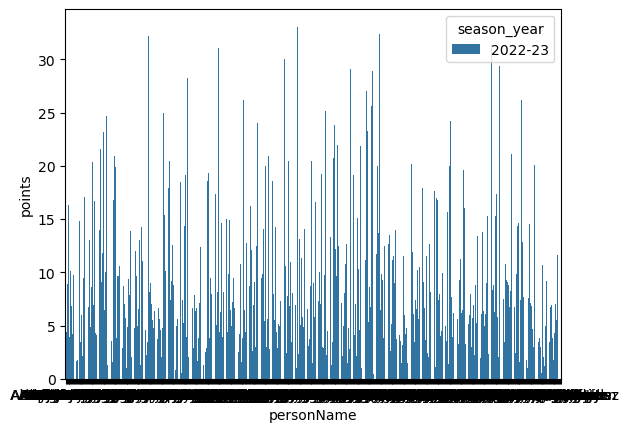

In [258]:
gamesPlayerStats=getPlayerStatsBySeason(regular_season_all_parts,'2022-23');
sns.barplot(data=gamesPlayerStats,x='personName',y='points',hue='season_year')

In [259]:
gamesPlayerStatsLe=getPlayerStatsBySeason(regular_season_all_parts,'2021-22','LeBro');
print(gamesPlayerStatsLe.shape)
print(gamesPlayerStatsLe)

(1, 13)
        personName season_year     points   assists  reboundsTotal    steals  \
4443  LeBron James     2021-22  30.267857  6.232143       8.196429  1.303571   

        blocks  turnovers  minutesParsed  fieldGoalsMade  \
4443  1.053571        3.5      37.220833       11.428571   

      fieldGoalsPercentage  threePointersMade  threePointersPercentage  
4443              0.523964              2.875                 0.355589  
